[home](http://www.brandonrose.org)

# Document Clustering with Python

<img src='header_short.jpg'>

In this guide, I will explain how to cluster a set of documents using Python. My motivating example is to identify the latent structures within the synopses of the top 100 films of all time (per an IMDB list). See [the original post](http://www.brandonrose.org/top100) for a more detailed discussion on the example. This guide covers:

<ul>
<li> tokenizing and stemming each synopsis
<li> transforming the corpus into vector space using [tf-idf](http://en.wikipedia.org/wiki/Tf%E2%80%93idf)
<li> calculating cosine distance between each document as a measure of similarity
<li> clustering the documents using the [k-means algorithm](http://en.wikipedia.org/wiki/K-means_clustering)
<li> using [multidimensional scaling](http://en.wikipedia.org/wiki/Multidimensional_scaling) to reduce dimensionality within the corpus
<li> plotting the clustering output using [matplotlib](http://matplotlib.org/) and [mpld3](http://mpld3.github.io/)
<li> conducting a hierarchical clustering on the corpus using [Ward clustering](http://en.wikipedia.org/wiki/Ward%27s_method)
<li> plotting a Ward dendrogram
<li> topic modeling using [Latent Dirichlet Allocation (LDA)](http://en.wikipedia.org/wiki/Latent_Dirichlet_allocation)
</ul>

In [2]:
from bs4 import BeautifulSoup
from time import sleep
from random import randint
from time import time
from requests import get

pages = [str(i) for i in range(1,3)]
years_url = [str(i) for i in range(2017,2018)]

names = []
years = []
imdb_ratings = []
genres = []
certificates = []
descriptions = []
gross = []

#Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2000-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:
        print(page)
        
        # Make a get request
        #request_url='http://www.imdb.com/search/title?release_date=' + year_url + '&page=' + page
        request_url = ('http://www.imdb.com/search/title?release_date='+ year_url +'&sort=moviemeter,asc&page=' + page + '&ref_=adv_prv')
        print(request_url)
        response = get(request_url)

        # Pause the loop
        sleep(randint(8,15))
        
        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        #clear_output(wait = True)
        
        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))
            
        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')  
            break 
            
        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')
        
        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            #if container.find('div', class_ = 'ratings-metascore') is not None:
                
                # Scrape the name
                name = container.h3.a.text
                names.append(name)
                
                # Scrape the year 
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append((year))
                
               
                      
                #To gete Gross
                raw_gross = container.find('span',attrs = {'class':'text-muted'})
                #find_next('span',attrs = {'name':'nv'})
                if raw_gross.text is not None and raw_gross.text == 'Gross:' :
                    raw_gross_1 = raw_gross.find_next('span',attrs = {'name':'nv'})
                    gross.append(raw_gross_1.text)
                else:
                    gross.append('') 
                
                
                #Certificate
                certificate = container.find('span',class_='certificate')
                if certificate is not None:
                    certificates.append(certificate.text)
                else:
                    certificates.append('')
                    
                # Scrape the description
                description1 = container.find('div',class_='ratings-bar')
                if description1 is not None:
                    description= description1.find_next('p',class_ = 'text-muted').text
                    descriptions.append(description.strip())
                else:
                    descriptions.append('')
                           
                
                # Scrape the genre
                genre_1 = container.find('span',class_ ='genre')
                if genre_1 is not None:
                    genres.append(genre_1.text.strip())
                else:
                    genres.append('')
                
                         

                
                # Scrape the IMDB rating
                #print(float(container.find('div',class_='inline-block ratings-imdb-rating')['data-value']))
                imdb_raw = container.find('div',class_='inline-block ratings-imdb-rating')
                if imdb_raw is not None:
                        imdb = float(container.strong.text)
                        imdb_ratings.append((imdb))
                    
                else:
#                     imdb_ratings = []
                    imdb_ratings.append(0.0)
                
                
                       
                
                

1
http://www.imdb.com/search/title?release_date=2017&sort=moviemeter,asc&page=1&ref_=adv_prv
Request:1; Frequency: 0.061972850618828824 requests/s
2
http://www.imdb.com/search/title?release_date=2017&sort=moviemeter,asc&page=2&ref_=adv_prv
Request:2; Frequency: 0.07516152418888647 requests/s


In [3]:
titles=[]
synopses=[]

In [4]:
for name in names:
    titles.append(name)

In [5]:
for description in descriptions:
    synopses.append(description)

In [17]:
genres

['Comedy, Horror',
 'Action, Adventure, Comedy',
 'Biography, Drama, Musical',
 'Adventure, Drama, Fantasy',
 'Drama, Fantasy, Thriller',
 'Action, Adventure, Comedy',
 'Action, Adventure, Fantasy',
 'Biography, Crime, Drama',
 'Action, Adventure, Fantasy',
 'Adventure, Drama, Family',
 'Animation, Adventure, Comedy',
 'Crime, Drama',
 'Comedy, Music',
 'Action, Crime, Mystery',
 'Biography, Crime, Drama',
 'Drama, Sci-Fi',
 'Crime, Drama, Mystery',
 'Drama',
 'Animation, Adventure, Comedy',
 'Biography, Comedy, Drama',
 'Comedy, Drama, Sci-Fi',
 'Drama, Sci-Fi, Thriller',
 'Drama, Romance',
 'Action, Adventure, Fantasy',
 'Action, Mystery, Thriller',
 'Drama, Mystery',
 'Drama, Mystery, Sci-Fi',
 'Drama, Romance',
 'Action, Adventure, Sci-Fi',
 'Drama, Family',
 'Horror, Mystery, Thriller',
 'Comedy, Drama',
 'Drama',
 'Drama, Horror, Thriller',
 'Action, Adventure, Sci-Fi',
 'Drama',
 'Comedy',
 'Crime, Drama, Mystery',
 'Action, Drama, Sci-Fi',
 'Biography, Drama, History',
 'Action

## Contents

<ul>
<li>[Stopwords, stemming, and tokenization](#Stopwords,-stemming,-and-tokenizing)
<li>[Tf-idf and document similarity](#Tf-idf-and-document-similarity)
<li>[K-means clustering](#K-means-clustering)
<li>[Multidimensional scaling](#Multidimensional-scaling)
<li>[Visualizing document clusters](#Visualizing-document-clusters)
<li>[Hierarchical document clustering](#Hierarchical-document-clustering)
<li>[Latent Dirichlet Allocation (LDA)](#Latent-Dirichlet-Allocation)
</ul>

But first, I import everything I am going to need up front

In [6]:
import numpy as np
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

#nltk.download('punkt')
#nltk.download('stopwords')


# Stopwords, stemming, and tokenizing

In [7]:
print(str(len(titles)) + ' titles')
print(str(len(synopses)) + ' synopses')
print(str(len(genres)) + ' genres')

100 titles
100 synopses
100 genres


In [8]:
# generates index for each item in the corpora (in this case it's just rank) and I'll use this for scoring later
ranks = []

for i in range(0,len(titles)):
    ranks.append(i)

This section is focused on defining some functions to manipulate the synopses. First, I load [NLTK's](http://www.nltk.org/) list of English stop words. [Stop words](http://en.wikipedia.org/wiki/Stop_words) are words like "a", "the", or "in" which don't convey significant meaning. I'm sure there are much better explanations of this out there.

In [9]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

Next I import the [Snowball Stemmer](http://snowball.tartarus.org/) which is actually part of NLTK. [Stemming](http://en.wikipedia.org/wiki/Stemming) is just the process of breaking a word down into its root.

In [10]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")


Below I define two functions:

<ul>
<li> *tokenize_and_stem*: tokenizes (splits the synopsis into a list of its respective words (or tokens) and also stems each token <li> *tokenize_only*: tokenizes the synopsis only
</ul>

I use both these functions to create a dictionary which becomes important in case I want to use stems for an algorithm, but later convert stems back to their full words for presentation purposes. Guess what, I do want to do that!



In [11]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

Below I use my stemming/tokenizing and tokenizing functions to iterate over the list of synopses to create two vocabularies: one stemmed and one only tokenized. 

In [12]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in synopses:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

Using these two lists, I create a pandas DataFrame with the stemmed vocabulary as the index and the tokenized words as the column. The benefit of this is it provides an efficient way to look up a stem and return a full token. The downside here is that stems to tokens are one to many: the stem 'run' could be associated with 'ran', 'runs', 'running', etc. For my purposes this is fine--I'm perfectly happy returning the first token associated with the stem I need to look up.

In [13]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

In [14]:
vocab_frame

,words
sheila,sheila
and,and
joel,joel
are,are
marri,married
real,real
estat,estate
agent,agents
in,in
santa,santa


## Tf-idf and document similarity

<img src='http://www.jiem.org/index.php/jiem/article/viewFile/293/252/2402' align='right' style="margin-left:10px">

Here, I define term frequency-inverse document frequency (tf-idf) vectorizer parameters and then convert the *synopses* list into a tf-idf matrix. 

To get a Tf-idf matrix, first count word occurrences by document. This is transformed into a document-term matrix (dtm). This is also just called a term frequency matrix. An example of a dtm is here at right.

Then apply the term frequency-inverse document frequency weighting: words that occur frequently within a document but not frequently within the corpus receive a higher weighting as these words are assumed to contain more meaning in relation to the document.

A couple things to note about the parameters I define below:

<ul>
<li> max_df: this is the maximum frequency within the documents a given feature can have to be used in the tfi-idf matrix. If the term is in greater than 80% of the documents it probably cares little meanining (in the context of film synopses)
<li> min_idf: this could be an integer (e.g. 5) and the term would have to be in at least 5 of the documents to be considered. Here I pass 0.2; the term must be in at least 20% of the document. I found that if I allowed a lower min_df I ended up basing clustering on names--for example "Michael" or "Tom" are names found in several of the movies and the synopses use these names frequently, but the names carry no real meaning.
<li> ngram_range: this just means I'll look at unigrams, bigrams and trigrams. See [n-grams](http://en.wikipedia.org/wiki/N-gram)
</ul>

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=200000,
                                 stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses)

print(tfidf_matrix.shape)

CPU times: user 105 ms, sys: 3.55 ms, total: 109 ms
Wall time: 107 ms
(100, 3655)


In [35]:
terms = tfidf_vectorizer.get_feature_names()

In [36]:
terms

["'s",
 "'s 100th",
 "'s 100th birthday",
 "'s ancestr",
 "'s ancestr ban",
 "'s attempt",
 "'s attempt hide",
 "'s bodyguard",
 "'s bodyguard new",
 "'s chase",
 "'s chase lead",
 "'s chief",
 "'s chief art",
 "'s dark",
 "'s dark buri",
 "'s day",
 "'s day depict",
 "'s discoveri",
 "'s discoveri long-buri",
 "'s exclus",
 "'s exclus high-stak",
 "'s exist",
 "'s exist brad",
 "'s femal",
 "'s femal newspap",
 "'s interstellar",
 "'s interstellar fleet",
 "'s involv",
 "'s involv fatal",
 "'s journey",
 "'s journey lead",
 "'s life",
 "'s life past",
 "'s life save",
 "'s london",
 "'s london reynold",
 "'s miss",
 "'s miss thirti",
 "'s murder",
 "'s murder fail",
 "'s nightmar",
 "'s nightmar overtak",
 "'s parent",
 "'s parent weekend",
 "'s race",
 "'s race clock",
 "'s relationship",
 "'s relationship test",
 "'s research",
 "'s research assist",
 "'s selfless",
 "'s selfless act",
 "'s ship",
 "'s ship empir",
 "'s stalk",
 "'s travel",
 "'s travel celebr",
 "'s true",
 "'s tru

In [37]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

# K-means clustering

Now onto the fun part. Using the tf-idf matrix, you can run a slew of clustering algorithms to better understand the hidden structure within the synopses. I first chose [k-means](http://en.wikipedia.org/wiki/K-means_clustering). K-means initializes with a pre-determined number of clusters (I chose 5). Each observation is assigned to a cluster (cluster assignment) so as to minimize the within cluster sum of squares. Next, the mean of the clustered observations is calculated and used as the new cluster centroid. Then, observations are reassigned to clusters and  centroids recalculated in an iterative process until the algorithm reaches convergence.

I found it took several runs for the algorithm to converge a global optimum as k-means is susceptible to reaching local optima. 

In [38]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 105 ms, sys: 3.54 ms, total: 109 ms
Wall time: 107 ms


In [39]:
from sklearn.externals import joblib

#joblib.dump(km,  'doc_cluster.pkl')
#km = joblib.load('test.pkl')
clusters = km.labels_.tolist()

In [40]:
import pandas as pd

films = { 'title': titles, 'rank': ranks, 'synopsis': synopses, 'cluster': clusters, 'genre': genres }

frame = pd.DataFrame(films, index = [clusters] , columns = ['rank', 'title', 'cluster', 'genre'])

In [41]:
frame['cluster'].value_counts()

1    46
4    17
0    15
2    12
3    10
Name: cluster, dtype: int64

In [42]:
grouped = frame['rank'].groupby(frame['cluster'])

grouped.mean()

cluster
0    52.666667
1    47.086957
2    47.833333
3    47.800000
4    55.411765
Name: rank, dtype: float64

In [43]:
from __future__ import print_function

print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :6]:
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print()
    print()
    print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster:

Cluster 0 words: b'family', b'captain', b'children', b'dangerous', b'army', b'legendary',

Cluster 0 titles: A Series of Unfortunate Events, Coco, Ferdinand, The Punisher, SEAL Team, Dunkirk, Dark, Paddington 2, Ozark, Dynasty, Pirates of the Caribbean: Dead Men Tell No Tales, Hostiles, Britannia, Suburbicon, The Square,

Cluster 1 words: b"'s", b'young', b'world', b'agents', b'girl', b'work',

Cluster 1 titles: Santa Clarita Diet, Jumanji: Welcome to the Jungle, The Greatest Showman, The Shape of Water, Thor: Ragnarok, Justice League, Pitch Perfect 3, La casa de papel, Molly's Game, Murder on the Orient Express, The Good Doctor, I, Tonya, Counterpart, Wonder Woman, Atomic Blonde, Get Out, Lady Bird, It, The Death of Stalin, Wind River, Darkest Hour, Verónica, You Were Never Really Here, The Disaster Artist, Baby Driver, Mindhunter, Kingsman: The Golden Circle, Dog Years, Beauty and the Beast, Logan, The End of the F***ing World, Alien: Covenant, The Beguiled, T

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


In [44]:
#This is purely to help export tables to html and to correct for my 0 start rank (so that Godfather is 1, not 0)
frame['Rank'] = frame['rank'] + 1
frame['Title'] = frame['title']

In [45]:
#export tables to HTML
print(frame[['Rank', 'Title']].loc[frame['cluster'] == 1].to_html(index=False))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Rank</th>
      <th>Title</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>Santa Clarita Diet</td>
    </tr>
    <tr>
      <td>2</td>
      <td>Jumanji: Welcome to the Jungle</td>
    </tr>
    <tr>
      <td>3</td>
      <td>The Greatest Showman</td>
    </tr>
    <tr>
      <td>4</td>
      <td>The Shape of Water</td>
    </tr>
    <tr>
      <td>6</td>
      <td>Thor: Ragnarok</td>
    </tr>
    <tr>
      <td>9</td>
      <td>Justice League</td>
    </tr>
    <tr>
      <td>13</td>
      <td>Pitch Perfect 3</td>
    </tr>
    <tr>
      <td>14</td>
      <td>La casa de papel</td>
    </tr>
    <tr>
      <td>15</td>
      <td>Molly's Game</td>
    </tr>
    <tr>
      <td>17</td>
      <td>Murder on the Orient Express</td>
    </tr>
    <tr>
      <td>18</td>
      <td>The Good Doctor</td>
    </tr>
    <tr>
      <td>20</td>
      <td>I, Tonya</td>
    </tr>
    <tr

# Multidimensional scaling

In [46]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [47]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

## Visualizing document clusters

In [48]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'Family, home, war', 
                 1: 'Police, killed, murders', 
                 2: 'Father, New York, brothers', 
                 3: 'Dance, singing, love', 
                 4: 'Killed, soldiers, captain'}

In [49]:
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


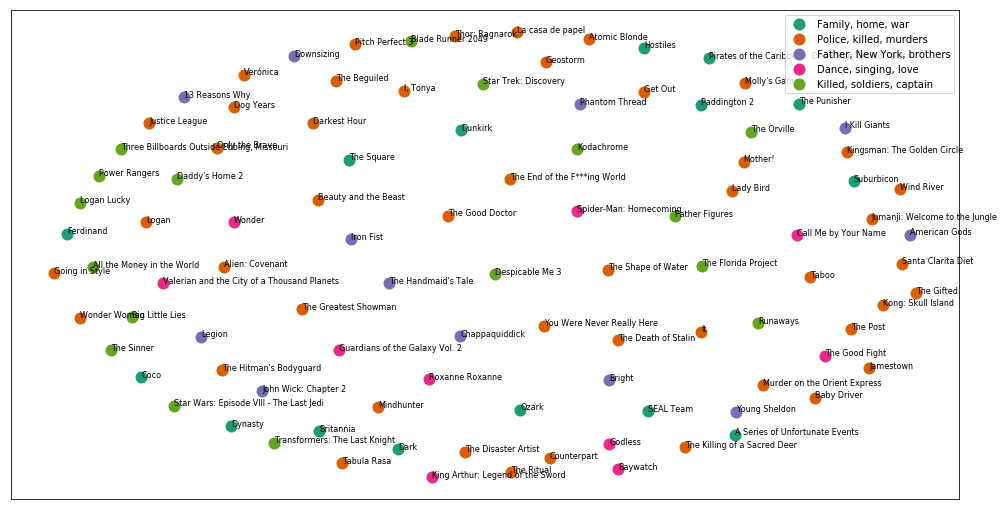

In [50]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [51]:
plt.close()

In [52]:
titles

['Santa Clarita Diet',
 'Jumanji: Welcome to the Jungle',
 'The Greatest Showman',
 'The Shape of Water',
 'I Kill Giants',
 'Thor: Ragnarok',
 'Star Wars: Episode VIII - The Last Jedi',
 'All the Money in the World',
 'Justice League',
 'A Series of Unfortunate Events',
 'Coco',
 'Three Billboards Outside Ebbing, Missouri',
 'Pitch Perfect 3',
 'La casa de papel',
 "Molly's Game",
 "The Handmaid's Tale",
 'Murder on the Orient Express',
 'The Good Doctor',
 'Ferdinand',
 'I, Tonya',
 'Downsizing',
 'Counterpart',
 'Call Me by Your Name',
 'Wonder Woman',
 'Atomic Blonde',
 '13 Reasons Why',
 'Blade Runner 2049',
 'Phantom Thread',
 'Spider-Man: Homecoming',
 'Wonder',
 'Get Out',
 'Lady Bird',
 'The Good Fight',
 'It',
 'Guardians of the Galaxy Vol. 2',
 'Roxanne Roxanne',
 'The Death of Stalin',
 'Wind River',
 'Legion',
 'Darkest Hour',
 'The Punisher',
 'SEAL Team',
 'Verónica',
 'Star Trek: Discovery',
 'Kodachrome',
 'Dunkirk',
 'You Were Never Really Here',
 'Dark',
 'The Disast

The clustering plot looks great, but it pains my eyes to see overlapping labels. Having some experience with [D3.js](http://d3js.org/) I knew one solution would be to use a browser based/javascript interactive. Fortunately, I recently stumbled upon [mpld3](https://mpld3.github.io/) a matplotlib wrapper for D3. Mpld3 basically let's you use matplotlib syntax to create web interactives. It has a really easy, high-level API for adding tooltips on mouse hover, which is what I am interested in.

It also has some nice functionality for zooming and panning. The below javascript snippet basicaly defines a custom location for where the zoom/pan toggle resides. Don't worry about it too much and you actually don't need to use it, but it helped for formatting purposes when exporting to the web later. The only thing you might want to change is the x and y attr for the position of the toolbar.

In [53]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [54]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, label=cluster_names[name], mec='none', color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

# Hierarchical document clustering

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


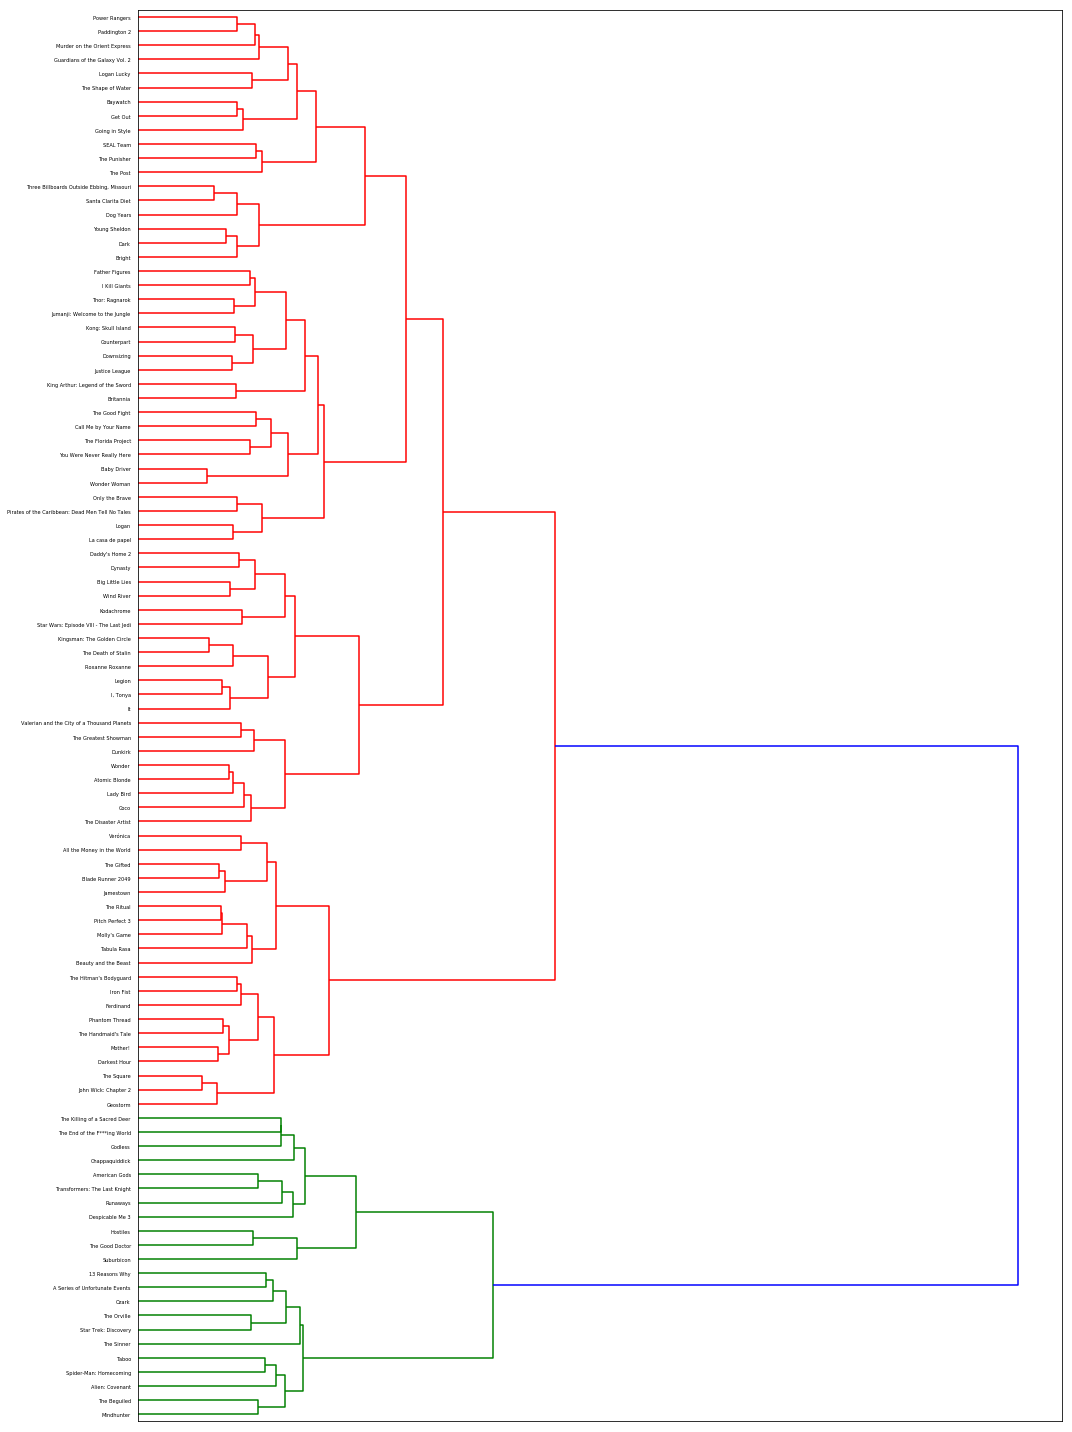

In [35]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [36]:
plt.close()

# Latent Dirichlet Allocation

In [37]:
#strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

In [60]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [61]:
#Latent Dirichlet Allocation implementation with Gensim

from gensim import corpora, models, similarities 

#remove proper names
preprocess = [strip_proppers(doc) for doc in synopses]

%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]

%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

CPU times: user 2.88 s, sys: 19.5 ms, total: 2.9 s
Wall time: 2.91 s
CPU times: user 357 ms, sys: 3.47 ms, total: 360 ms
Wall time: 366 ms


/Users/karthikub/.virtualenvs/cluster/lib/python2.7/site-packages/numpy/lib/utils.py:95: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  warnings.warn(depdoc, DeprecationWarning)
/Users/karthikub/.virtualenvs/cluster/lib/python2.7/site-packages/scipy/lib/_util.py:67: DeprecationWarning: Module scipy.linalg.blas.fblas is deprecated, use scipy.linalg.blas instead
  DeprecationWarning)
/Users/karthikub/.virtualenvs/cluster/lib/python2.7/site-packages/scipy/lib/_util.py:67: DeprecationWarning: Module scipy.linalg.blas.fblas is deprecated, use scipy.linalg.blas instead
  DeprecationWarning)
/Users/karthikub/.virtualenvs/cluster/lib/python2.7/site-packages/scipy/lib/_util.py:67: DeprecationWarning: Module scipy.linalg.blas.fblas is deprecated, use scipy.linalg.blas instead
  DeprecationWarning)
/Users/karthikub/.virtualenvs/cluster/lib/python2.7/site-packages/scipy/lib/_util.py:67: Deprecat

In [35]:
#print(len([word for word in texts[0] if word not in stopwords]))
print(len(texts[0]))

1839


In [36]:
dictionary = corpora.Dictionary(texts)

In [37]:
dictionary.filter_extremes(no_below=1, no_above=0.8)

In [38]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [39]:
len(corpus)

100

In [ ]:
%time lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, update_every=5, chunksize=10000, passes=100)

In [ ]:
print(lda[corpus[0]])

In [141]:
topics = lda.print_topics(5, num_words=20)

In [143]:
topics_matrix = lda.show_topics(formatted=False, num_words=20)

In [144]:
topics_matrix = np.array(topics_matrix)

In [145]:
topics_matrix.shape

(5, 20, 2)

In [146]:
topic_words = topics_matrix[:,:,1]

In [147]:
for i in topic_words:
    print([str(word) for word in i])
    print()

['famili', 'murder', 'prison', 'work', 'kill', 'life', 'guard', 'way', "n't", 'two', 'meet', 'would', 'death', 'say', 'll', 'vote', 'becom', 'ask', 'guilti', 'peopl']

['love', 'marri', 'go', 'home', 'friend', 'show', 'day', 'father', 'meet', 'want', "n't", 'night', 'doe', 'apart', 'famili', 'work', 'film', 'first', 'sing', 'come']

['kill', 'meet', 'arriv', 'first', 'two', 'order', 'escap', 'friend', 'say', 'famili', 'ask', 'call', 'attempt', 'father', 'later', 'refus', "n't", 'offer', 'name', 'away']

['kill', 'soldier', 'men', 'order', 'shark', 'command', 'attack', 'water', 'war', 'offic', 'arriv', 'boat', 'die', 'wound', 'two', 'attempt', 'villag', 'fire', 'battl', 'shoot']

['car', 'ask', 'polic', 'home', "n't", 'go', 'say', 'kill', 'run', 'hous', 'goe', 'two', 'friend', 'day', 'call', 'come', 'drive', 'meet', 'doe', 'away']

